In [1]:
import math
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/data/train.csv')
df.tail(5)
set(df['organ'])

{'kidney', 'largeintestine', 'lung', 'prostate', 'spleen'}

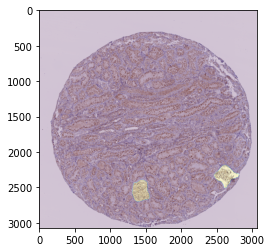

In [3]:
img = np.array(Image.open('/data/train_images/9769.tiff'))
mask = np.array(Image.open('/data/train_masks/9769.png'))
plt.imshow(img)
plt.imshow(mask, alpha=0.2)
plt.show()

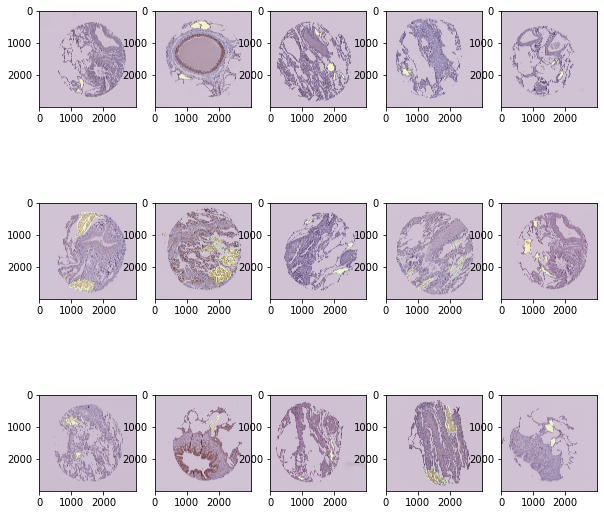

In [26]:
fig = plt.figure(figsize=(10,10))
columns = 5
rows = 3

idx = 1
for i in range(len(df)):
    if idx == columns*rows + 1:
        break
    data = df.iloc[i]
    if data['organ'] == 'lung':
        img = np.array(Image.open('/data/train_images/' + str(data['id']) + '.tiff'))
        mask = np.array(Image.open('/data/train_masks/' + str(data['id']) + '.png'))
        fig.add_subplot(rows, columns, idx)
        plt.imshow(img)
        plt.imshow(mask, alpha=0.2)
        idx += 1

plt.show()

In [7]:
def tile_image(img: Image, tid_w: int, tid_h: int, tile_size) -> Image:
    img = np.array(img)
    img = img[tid_h*tile_size:(tid_h+1)*tile_size, tid_w*tile_size:(tid_w+1)*tile_size, ...]
    if img.shape[:2] != (tile_size, tile_size):
        img_ = np.copy(img)
        if len(img.shape)==3:
            img = np.zeros([tile_size, tile_size, img.shape[2]], dtype=img.dtype)
            img[:img_.shape[0], :img_.shape[1], ...] = img_
        elif len(img.shape)==2:
            img = np.zeros([tile_size, tile_size], dtype=img.dtype)
            img[:img_.shape[0], :img_.shape[1]] = img_
    return img

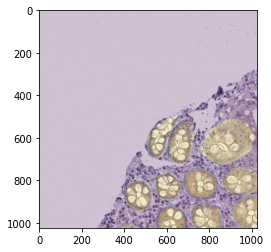

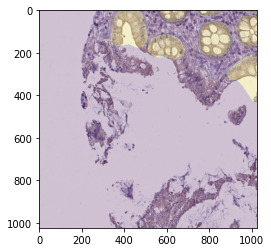

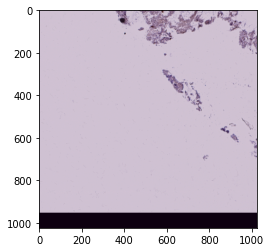

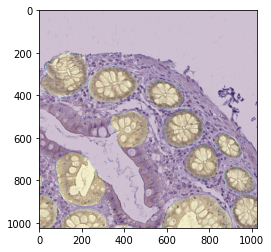

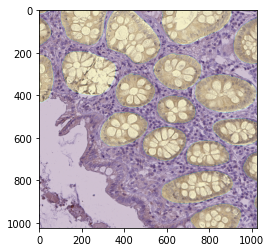

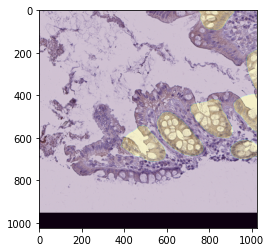

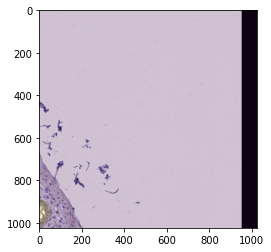

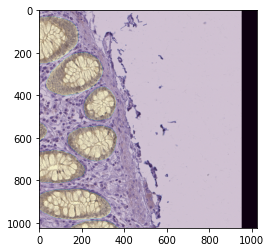

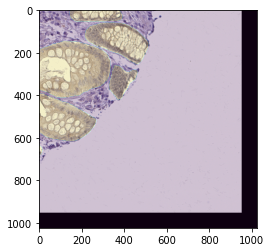

In [10]:
tile_size =1024
h, w, _ = img.shape
n_tile_w = math.ceil(w / tile_size)
n_tile_h = math.ceil(h / tile_size)
n_tile_w, n_tile_h

for i in range(n_tile_h):
    for j in range(n_tile_w):
        tiled_img = tile_image(img, i, j, tile_size)
        tiled_mask = tile_image(mask, i, j, tile_size)
        plt.imshow(tiled_img)
        plt.imshow(tiled_mask, alpha=0.2)
        plt.show()